In [1]:
#Dataset preparation and column confirmation

import pandas as pd
df=pd.read_csv('https://docs.google.com/uc?export=download&id=1g47i2JV1ymfpn_6GVqfTB-dvaz9AkTYT')
pd.set_option('display.max_columns',None)
print(df.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  fractal_dimension_mean  radius_se  texture_s

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-package

Text(0.5, 1.0, '5_symmetry_mean and fractal_dimension_mean')

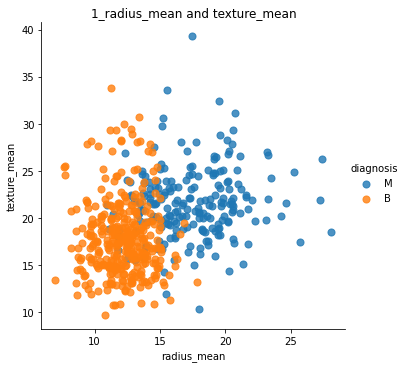

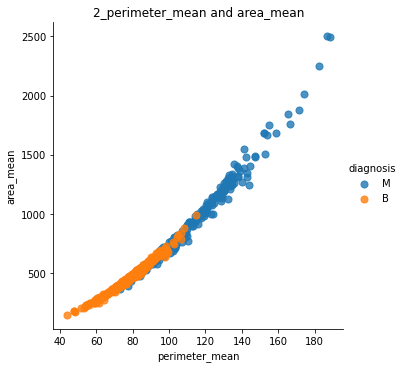

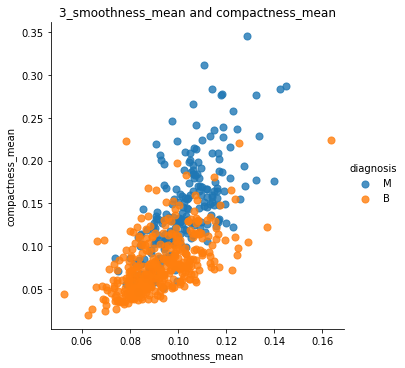

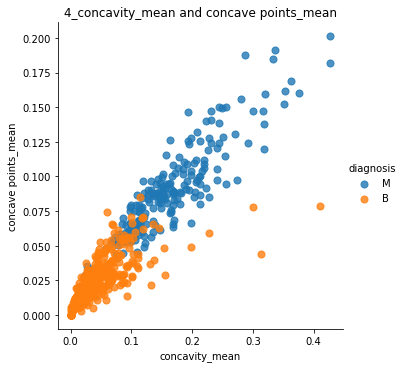

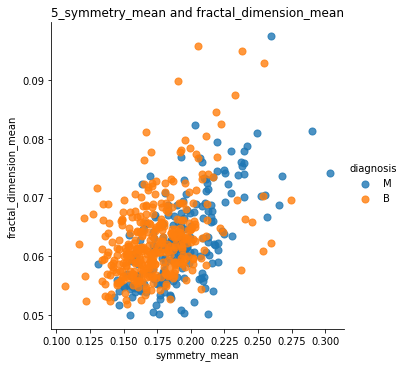

In [ ]:
#Dataset visualization

import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot('radius_mean','texture_mean',data=df,fit_reg=False,scatter_kws={'s':50},markers='o',hue='diagnosis')
plt.title('1_radius_mean and texture_mean')

sns.lmplot('perimeter_mean','area_mean',data=df,fit_reg=False,scatter_kws={'s':50},markers='o',hue='diagnosis')
plt.title('2_perimeter_mean and area_mean')

sns.lmplot('smoothness_mean','compactness_mean',data=df,fit_reg=False,scatter_kws={'s':50},markers='o',hue='diagnosis')
plt.title('3_smoothness_mean and compactness_mean')

sns.lmplot('concavity_mean','concave points_mean',data=df,fit_reg=False,scatter_kws={'s':50},markers='o',hue='diagnosis')
plt.title('4_concavity_mean and concave points_mean')

sns.lmplot('symmetry_mean','fractal_dimension_mean',data=df,fit_reg=False,scatter_kws={'s':50},markers='o',hue='diagnosis')
plt.title('5_symmetry_mean and fractal_dimension_mean')

In [ ]:
# Data preprocessing
df.drop(['id','symmetry_mean','fractal_dimension_mean','radius_se','texture_se','perimeter_se','area_se','smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se','radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst'], axis=1,inplace=True)
print(df.head())

  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  
0          0.11840           0.27760          0.3001              0.14710  
1          0.08474           0.07864          0.0869              0.07017  
2          0.10960           0.15990          0.1974              0.12790  
3          0.14250           0.28390          0.2414              0.10520  
4          0.10030           0.13280          0.1980              0.10430  


In [ ]:
# Test/Train set split
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)

print(train.shape[0])
print(test.shape[0])

455
114


In [ ]:
#KNN parameter
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
import numpy as np

cross_validation_scores=[]
x_train=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_train=train[['diagnosis']]
max_k_range=train.shape[0]//2
k_list=[]
for i in range(3,max_k_range, 2):
  k_list.append(i)

for k in k_list:
  knn=KNeighborsClassifier(n_neighbors=k)
  scores=cross_val_score(knn,x_train,y_train.values.ravel(),cv=10,scoring='accuracy')
  cross_validation_scores.append(scores.mean())

k=k_list[cross_validation_scores.index(max(cross_validation_scores))]
print('The best number of k: '+str(k))

The best number of k: 75


In [ ]:
# SVM parameter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

def svc_param_selection(X,y,nfolds):
  svm_parameters=[{'kernel':['rbf'],'gamma':[0.000001, 0.00001,0.0001, 0.001,0.01],'C':[1000,10000,100000,1000000]}]
  clf=GridSearchCV(SVC(),svm_parameters,cv=10)
  clf.fit(x_train,y_train.values.ravel())
  print(clf.best_params_)

  return clf

x_train=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_train=train[['diagnosis']]
clf=svc_param_selection(x_train,y_train.values.ravel(),10)

{'C': 1000000, 'gamma': 0.0001, 'kernel': 'rbf'}


In [ ]:
#Decision Tree parameter
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
dt_param_grid={'max_depth':[2,3,4,5],'min_samples_split':[2,3,4,5,6,7,8,9,10],'min_samples_leaf':[2,3,4,5,6,7,8,9,10], 'criterion': ['gini','entropy']}
dt_clf=DecisionTreeClassifier(random_state=10)
x_train=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_train=train[['diagnosis']]
grid=GridSearchCV(dt_clf,param_grid=dt_param_grid,scoring='accuracy')
grid.fit(x_train,y_train.values.ravel())
print(grid.best_params_)

{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [ ]:
# Accuracy of each model
x_test=test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_test=test[['diagnosis']]

dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5,min_samples_split=2)
dtree=dtree.fit(x_train,y_train.values.ravel())
dtree_predicted=dtree.predict(x_test)

knn=KNeighborsClassifier(n_neighbors=75).fit(x_train,y_train.values.ravel())
knn_predicted=knn.predict(x_test)

svm=SVC(C=1000000,gamma=0.0001,probability=True).fit(x_train,y_train.values.ravel())
svm_predicted=svm.predict(x_test)

print('[accuracy]')
print('d-tree: ',accuracy_score(y_test,dtree_predicted))
print('knn: ',accuracy_score(y_test,knn_predicted))
print('svm: ',accuracy_score(y_test,svm_predicted))

[accuracy]
d-tree:  0.9210526315789473
knn:  0.9122807017543859
svm:  0.9298245614035088


In [ ]:
# Classification Voting Ensemble
from sklearn.ensemble import VotingClassifier

x_train=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_train=train[['diagnosis']]
x_test=test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_test=test[['diagnosis']]

dtree=tree.DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_leaf=5,min_samples_split=2)
dtree=dtree.fit(x_train,y_train.values.ravel())

knn=KNeighborsClassifier(n_neighbors=75).fit(x_train,y_train.values.ravel())

svm=SVC(C=1000000,gamma=0.0001,probability=True).fit(x_train,y_train.values.ravel())

voting_model=VotingClassifier(estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],weights=[1,1,1],voting='hard')
voting_model.fit(x_train,y_train.values.ravel())
hard_voting_predicted=voting_model.predict(x_test)
print(accuracy_score(y_test,hard_voting_predicted))

voting_model=VotingClassifier(estimators=[('decision_tree',dtree),('knn',knn),('svm',svm)],weights=[0.5,0.5,1],voting='soft')
voting_model.fit(x_train,y_train.values.ravel())
soft_voting_predicted=voting_model.predict(x_test)
print(accuracy_score(y_test,soft_voting_predicted))

0.9473684210526315
0.956140350877193


In [ ]:
#Random Forest parameter
from sklearn.ensemble import RandomForestClassifier

x_train=train[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_train=train[['diagnosis']]
x_test=test[['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean','compactness_mean','concavity_mean','concave points_mean']]
y_test=test[['diagnosis']]

rf_clf=RandomForestClassifier(random_state=20)
rf_param_grid={'n_estimators':[15,20,25],'max_depth':[5,6,7,8],'max_leaf_nodes':[15,20,30],'min_samples_leaf':[2,3,4],'min_samples_split':[2,3,4],'criterion':['gini','entropy']}
rf_grid = GridSearchCV(rf_clf, param_grid = rf_param_grid, scoring='accuracy', n_jobs=2)
rf_grid.fit(x_train, y_train.values.ravel())
print(rf_grid.best_params_)



{'criterion': 'gini', 'max_depth': 6, 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 20}


In [ ]:

#Random Forest Classifier 
best_rfc=RandomForestClassifier(n_estimators=20, max_depth=60 ,max_leaf_nodes=60 ,min_samples_leaf=2 ,min_samples_split=2 ,criterion='gini', n_jobs=2)
best_rfc.fit(x_train,y_train.values.ravel())
y_pred=best_rfc.predict(x_test)
print(accuracy_score(y_test,y_pred))

0.956140350877193


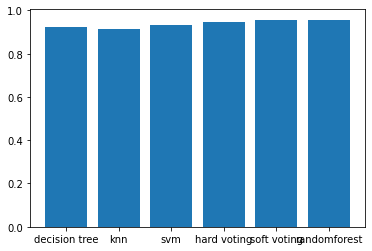

In [ ]:
# Comparison of accuracy (Final)
x = np.arange(6)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted), 
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted), accuracy_score(y_test,y_pred)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting','randomforest']); 
